In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
data_train=pd.read_csv("loanap_train.csv")
data_test=pd.read_csv("loanap_test.csv")

In [5]:
data_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
data_train.shape,data_test.shape

((614, 13), (367, 12))

In [8]:
## let us combine the data for data exploration
data_loan=pd.concat([data_train,data_test],axis=0,sort=True)

In [9]:
data_loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
data_loan.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


In [11]:
data_loan.shape

(981, 13)

In [12]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    981 non-null    int64  
 1   CoapplicantIncome  981 non-null    float64
 2   Credit_History     902 non-null    float64
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Gender             957 non-null    object 
 6   LoanAmount         954 non-null    float64
 7   Loan_Amount_Term   961 non-null    float64
 8   Loan_ID            981 non-null    object 
 9   Loan_Status        614 non-null    object 
 10  Married            978 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Self_Employed      926 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [13]:
data_loan.describe(include='all')

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
count,981.000000,981.000000,902.000000,956,981,957,954.000000,961.000000,981,614,978,981,926
unique,NaN,NaN,NaN,4,2,2,NaN,NaN,981,2,2,3,2
top,NaN,NaN,NaN,0,Graduate,Male,NaN,NaN,LP001935,Y,Yes,Semiurban,No
freq,NaN,NaN,NaN,545,763,775,NaN,NaN,1,422,631,349,807
mean,5179.795107,1601.916330,0.835920,NaN,NaN,NaN,142.511530,342.201873,NaN,NaN,NaN,NaN,NaN
std,5695.104533,2718.772806,0.370553,NaN,NaN,NaN,77.421743,65.100602,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN
25%,2875.000000,0.000000,1.000000,NaN,NaN,NaN,100.000000,360.000000,NaN,NaN,NaN,NaN,NaN
50%,3800.000000,1110.000000,1.000000,NaN,NaN,NaN,126.000000,360.000000,NaN,NaN,NaN,NaN,NaN
75%,5516.000000,2365.000000,1.000000,NaN,NaN,NaN,162.000000,360.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
data_loan.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [15]:
##sns.pairplot(data=data_loan,hue='Loan_Status')

In [16]:
##corr=data_loan.corr()

In [17]:
##corr

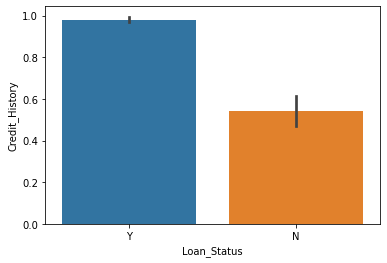

In [18]:
## now lets us try to fill missing values
sns.barplot(x='Loan_Status',y='Credit_History',data=data_loan)

In [19]:
data_loan.Credit_History.value_counts()
## lets us fill the missind value by most occurent value ie 1

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [20]:
## lets us fill with mode
data_loan['Credit_History']=data_loan['Credit_History'].fillna(1)


In [21]:
data_loan['Credit_History']=data_loan['Credit_History'].astype(int)

In [22]:
data_loan.Credit_History.isnull().sum()

0

In [23]:
data_loan.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

(array([545.,   0., 160.,   0.,   0., 160.,   0.,  91.,   0.,  25.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

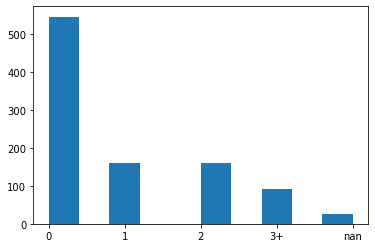

In [24]:
## lets us check the data distribution
data_loan['dummyDependents']=data_loan['Dependents'].copy()
data_loan['dummyDependents']=data_loan['dummyDependents'].astype(str)
plt.hist(data_loan['dummyDependents'],)
##sns.barplot(x='Dependents',y='ApplicantIncome',data=data_loan)

In [25]:
data_loan.Dependents.isnull().sum()

25

In [26]:
data_loan.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [27]:
## since most of the value are zero lets us try to fill the same
data_loan['Dependents']=data_loan['Dependents'].fillna(0)



In [28]:
from pandas_profiling import ProfileReport

In [29]:
## to create simple report
report=ProfileReport(data_loan,title='loan report',explorative=True)

In [30]:
report.to_widgets()

In [31]:
## let us fill the gender with most occurent value
data_loan['Gender']=data_loan['Gender'].fillna('Male')

In [32]:
data_loan.Gender.isnull().sum()

0

In [33]:
data_loan.Gender.value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

(array([ 19.,  92., 234., 281., 150.,  88.,  20.,  25.,  15.,   6.,   5.,
          4.,   1.,   5.,   3.,   1.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <a list of 20 Patch objects>)

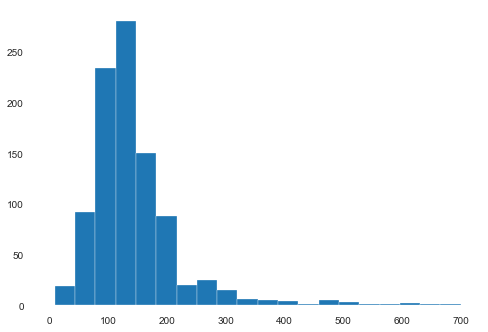

In [34]:
## lets us fill the loanamount missing values
plt.hist(data_loan['LoanAmount'],bins=20)

In [35]:
data_loan['loandummy']=data_loan['LoanAmount'].copy()
data_loan['loandummy']=data_loan['loandummy'].fillna(0)

##sns.distplot(data_loan['Loandummy'])

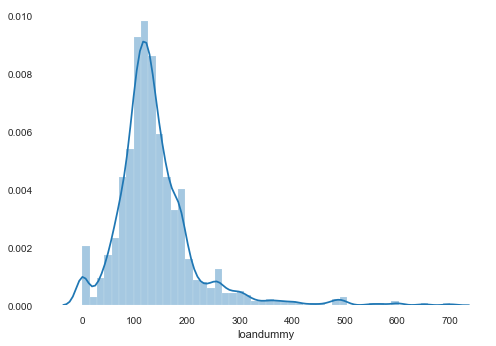

In [36]:
sns.distplot(data_loan['loandummy'])

## Even though there are some skewness/outliers we will try to fill with the average value since the data has significant of normal distributions


In [37]:
 data_loan['LoanAmount']=data_loan['LoanAmount'].fillna(data_loan['LoanAmount'].mean())

In [38]:
data_loan['LoanAmount']=data_loan['LoanAmount'].astype(int)

C:\Users\venkatesh\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


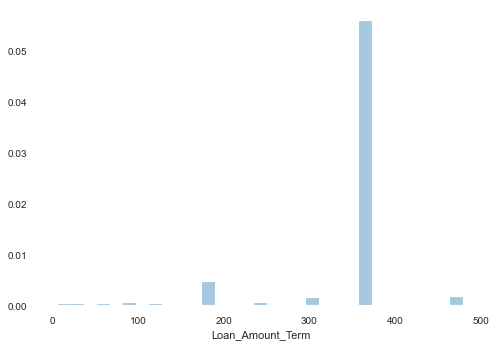

In [39]:
## lets us fill the loanamountterm
sns.distplot(data_loan['Loan_Amount_Term'])

(array([  6.,  10.,   4.,  66.,   8.,   0.,  20., 824.,   0.,  23.]),
 array([  6. ,  53.4, 100.8, 148.2, 195.6, 243. , 290.4, 337.8, 385.2,
        432.6, 480. ]),
 <a list of 10 Patch objects>)

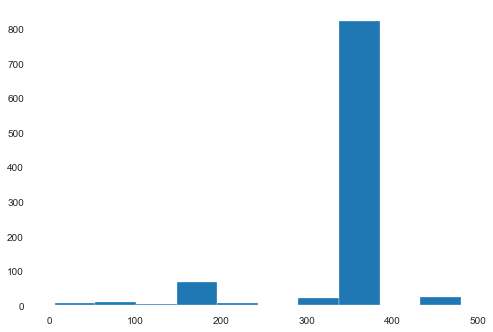

In [40]:
plt.hist(data_loan['Loan_Amount_Term'])

In [41]:
data_loan.Loan_Amount_Term.mean()

342.2018730489074

In [42]:
## as we can see the data distributions we can observe that the avg months of terms for loan is around 350 - 400. 
## even though we some distributions form 150 - 200 but it doesn't make any significant impact in the data.
## let us fill by the average value

In [43]:
data_loan['Loan_Amount_Term']=data_loan['Loan_Amount_Term'].fillna(data_loan['Loan_Amount_Term'].mean())

In [44]:
data_loan['Loan_Amount_Term']=data_loan['Loan_Amount_Term'].astype(int)

In [45]:
data_loan['Loan_Amount_Term'].isnull().sum()

0

(array([807.,   0.,   0.,   0.,   0., 119.,   0.,   0.,   0.,  55.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

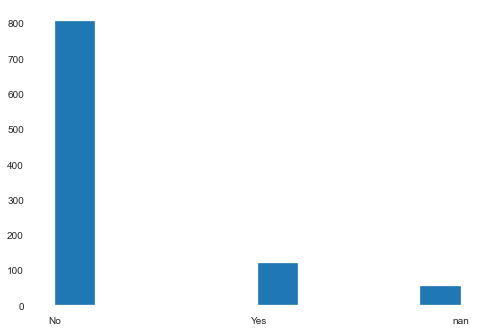

In [46]:
## lets us try to visualize the self emp feature
data_loan['dummyemp']=data_loan['Self_Employed'].copy()
data_loan['dummyemp']=data_loan['dummyemp'].astype(str)
plt.hist(data_loan['dummyemp'])

In [47]:
## as we observe over 90 percent of people are not self employeed lets proceed with the same to fill the missing values
data_loan['Self_Employed']=data_loan['Self_Employed'].fillna('NO')


In [48]:
data_loan.Self_Employed.isnull().sum()

0

In [49]:
data_loan.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,dummyDependents,loandummy,dummyemp
0,5849,0.0,1,0,Graduate,Male,142,360,LP001002,Y,No,Urban,No,0,0.0,No
1,4583,1508.0,1,1,Graduate,Male,128,360,LP001003,N,Yes,Rural,No,1,128.0,No
2,3000,0.0,1,0,Graduate,Male,66,360,LP001005,Y,Yes,Urban,Yes,0,66.0,Yes
3,2583,2358.0,1,0,Not Graduate,Male,120,360,LP001006,Y,Yes,Urban,No,0,120.0,No
4,6000,0.0,1,0,Graduate,Male,141,360,LP001008,Y,No,Urban,No,0,141.0,No
5,5417,4196.0,1,2,Graduate,Male,267,360,LP001011,Y,Yes,Urban,Yes,2,267.0,Yes
6,2333,1516.0,1,0,Not Graduate,Male,95,360,LP001013,Y,Yes,Urban,No,0,95.0,No
7,3036,2504.0,0,3+,Graduate,Male,158,360,LP001014,N,Yes,Semiurban,No,3+,158.0,No
8,4006,1526.0,1,2,Graduate,Male,168,360,LP001018,Y,Yes,Urban,No,2,168.0,No
9,12841,10968.0,1,1,Graduate,Male,349,360,LP001020,N,Yes,Semiurban,No,1,349.0,No


In [50]:
data_loan=data_loan.drop(['dummyDependents','loandummy','dummyemp'],axis=1)

In [51]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    981 non-null    int64  
 1   CoapplicantIncome  981 non-null    float64
 2   Credit_History     981 non-null    int32  
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Gender             981 non-null    object 
 6   LoanAmount         981 non-null    int32  
 7   Loan_Amount_Term   981 non-null    int32  
 8   Loan_ID            981 non-null    object 
 9   Loan_Status        614 non-null    object 
 10  Married            978 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Self_Employed      981 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(8)
memory usage: 115.8+ KB


In [52]:
## lets us fill the married feature with most occurence value
data_loan['Married']=data_loan['Married'].fillna('Yes')

In [53]:
data_loan.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [54]:
data_loan.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1,0,Graduate,Male,142,360,LP001002,Y,No,Urban,No
1,4583,1508.0,1,1,Graduate,Male,128,360,LP001003,N,Yes,Rural,No
2,3000,0.0,1,0,Graduate,Male,66,360,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1,0,Not Graduate,Male,120,360,LP001006,Y,Yes,Urban,No
4,6000,0.0,1,0,Graduate,Male,141,360,LP001008,Y,No,Urban,No
5,5417,4196.0,1,2,Graduate,Male,267,360,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1,0,Not Graduate,Male,95,360,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0,3+,Graduate,Male,158,360,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1,2,Graduate,Male,168,360,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1,1,Graduate,Male,349,360,LP001020,N,Yes,Semiurban,No


In [55]:
data_loan.CoapplicantIncome.value_counts()

0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
         ... 
1131.0      1
4700.0      1
2374.0      1
5302.0      1
3422.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [56]:
data_loan.CoapplicantIncome.describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

(0.0, 50000.0)

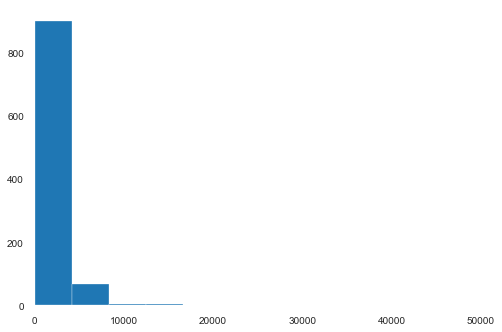

In [57]:
plt.hist(data_loan['CoapplicantIncome'])
plt.xlim(xmin=0, xmax = 50000)


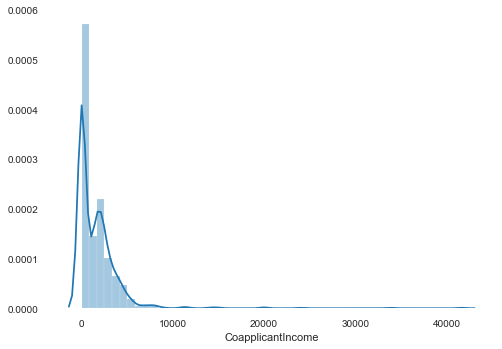

In [58]:
sns.distplot(data_loan['CoapplicantIncome'])

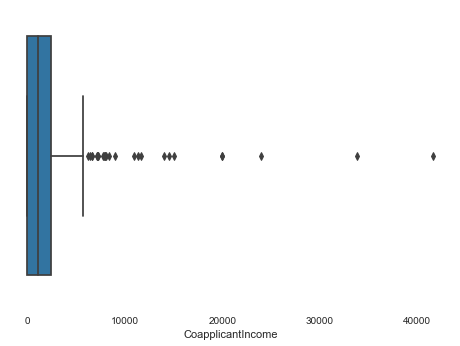

In [59]:
sns.boxplot(x='CoapplicantIncome',data=data_loan)

In [60]:
## let us convert the feature to categorical
## let us categories into 6 parts
data_loan["CoapplicantIncome"] = data_loan["CoapplicantIncome"].astype(int)
data_loan.loc[ data_loan["CoapplicantIncome"] <= 500, 'CoapplicantIncome'] = 0
data_loan.loc[(data_loan["CoapplicantIncome"] > 500) & (data_loan["CoapplicantIncome"] <= 1000), 'CoapplicantIncome'] = 1
data_loan.loc[(data_loan["CoapplicantIncome"] > 1000) & (data_loan["CoapplicantIncome"] <= 10000), 'CoapplicantIncome'] = 2
data_loan.loc[ data_loan["CoapplicantIncome"] > 10000, 'CoapplicantIncome'] = 3

In [61]:
data_loan.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0,1,0,Graduate,Male,142,360,LP001002,Y,No,Urban,No
1,4583,2,1,1,Graduate,Male,128,360,LP001003,N,Yes,Rural,No
2,3000,0,1,0,Graduate,Male,66,360,LP001005,Y,Yes,Urban,Yes
3,2583,2,1,0,Not Graduate,Male,120,360,LP001006,Y,Yes,Urban,No
4,6000,0,1,0,Graduate,Male,141,360,LP001008,Y,No,Urban,No
5,5417,2,1,2,Graduate,Male,267,360,LP001011,Y,Yes,Urban,Yes
6,2333,2,1,0,Not Graduate,Male,95,360,LP001013,Y,Yes,Urban,No
7,3036,2,0,3+,Graduate,Male,158,360,LP001014,N,Yes,Semiurban,No
8,4006,2,1,2,Graduate,Male,168,360,LP001018,Y,Yes,Urban,No
9,12841,3,1,1,Graduate,Male,349,360,LP001020,N,Yes,Semiurban,No


In [62]:
data_loan.CoapplicantIncome.value_counts()

2    492
0    442
1     36
3     11
Name: CoapplicantIncome, dtype: int64

In [63]:
data_loan.ApplicantIncome.describe()

count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

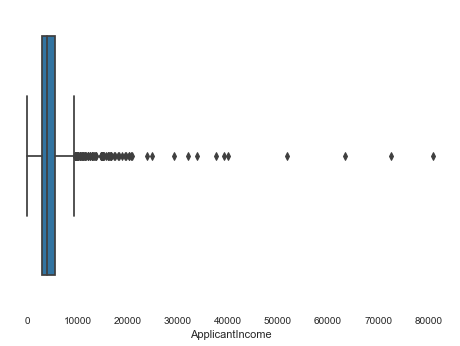

In [64]:
sns.boxplot(x='ApplicantIncome',data=data_loan)

In [65]:
## let us convert the applicantincome feature
data_loan["ApplicantIncome"] = data_loan["ApplicantIncome"].astype(int)
data_loan.loc[ data_loan["ApplicantIncome"] <= 10000, 'ApplicantIncome'] = 0
data_loan.loc[(data_loan["ApplicantIncome"] > 10000) & (data_loan["ApplicantIncome"] <= 20000), 'ApplicantIncome'] = 1
data_loan.loc[ data_loan["ApplicantIncome"] > 20000, 'ApplicantIncome'] = 3

In [66]:
data_loan.ApplicantIncome.value_counts()

0    912
1     53
3     16
Name: ApplicantIncome, dtype: int64

In [67]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplicantIncome    981 non-null    int32 
 1   CoapplicantIncome  981 non-null    int32 
 2   Credit_History     981 non-null    int32 
 3   Dependents         981 non-null    object
 4   Education          981 non-null    object
 5   Gender             981 non-null    object
 6   LoanAmount         981 non-null    int32 
 7   Loan_Amount_Term   981 non-null    int32 
 8   Loan_ID            981 non-null    object
 9   Loan_Status        614 non-null    object
 10  Married            981 non-null    object
 11  Property_Area      981 non-null    object
 12  Self_Employed      981 non-null    object
dtypes: int32(5), object(8)
memory usage: 108.1+ KB


In [68]:
## lets change depandent object
mapping={'0': 0, '1': 1, '2': 2, '3+' : 3,0:0}
data_loan['Dependents']=data_loan['Dependents'].map(mapping)

In [69]:
data_loan['Dependents']=data_loan['Dependents'].astype(int)
data_loan.Dependents.value_counts()

0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64

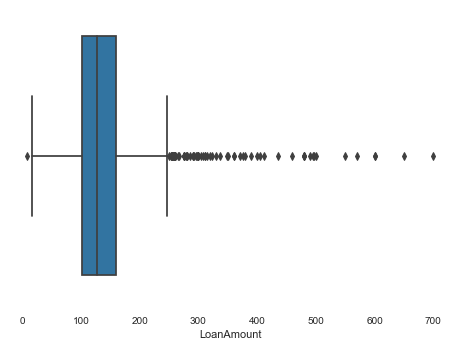

In [70]:
sns.boxplot(x='LoanAmount',data=data_loan)

In [71]:
## let us convert the LoanAmount feature
data_loan["LoanAmount"] = data_loan["LoanAmount"].astype(int)
data_loan.loc[ data_loan["LoanAmount"] <= 200, 'LoanAmount'] = 0
data_loan.loc[(data_loan["LoanAmount"] > 200) & (data_loan["LoanAmount"] <= 400), 'LoanAmount'] = 1
data_loan.loc[ data_loan["LoanAmount"] > 400, 'LoanAmount'] = 3

In [72]:
## let us convert the Loan_Amount_Term feature
data_loan["Loan_Amount_Term"] = data_loan["Loan_Amount_Term"].astype(int)
data_loan.loc[ data_loan["Loan_Amount_Term"] <= 200, 'Loan_Amount_Term'] = 0
data_loan.loc[(data_loan["Loan_Amount_Term"] > 200) & (data_loan["Loan_Amount_Term"] <= 400), 'Loan_Amount_Term'] = 1
data_loan.loc[ data_loan["Loan_Amount_Term"] > 400, 'Loan_Amount_Term'] = 3

In [73]:
data_loan

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,0,0,1,0,Graduate,Male,0,1,LP001002,Y,No,Urban,No
1,0,2,1,1,Graduate,Male,0,1,LP001003,N,Yes,Rural,No
2,0,0,1,0,Graduate,Male,0,1,LP001005,Y,Yes,Urban,Yes
3,0,2,1,0,Not Graduate,Male,0,1,LP001006,Y,Yes,Urban,No
4,0,0,1,0,Graduate,Male,0,1,LP001008,Y,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,Not Graduate,Male,0,1,LP002971,NaN,Yes,Urban,Yes
363,0,1,1,0,Graduate,Male,0,1,LP002975,NaN,Yes,Urban,No
364,0,2,1,0,Graduate,Male,0,1,LP002980,NaN,No,Semiurban,No
365,0,2,1,0,Graduate,Male,0,1,LP002986,NaN,Yes,Rural,No


In [74]:
## Its intutive that Loan id does not make any impact on the prediction lets remove that
data_loan=data_loan.drop('Loan_ID',axis=1)

In [75]:
data_loan

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,0,0,1,0,Graduate,Male,0,1,Y,No,Urban,No
1,0,2,1,1,Graduate,Male,0,1,N,Yes,Rural,No
2,0,0,1,0,Graduate,Male,0,1,Y,Yes,Urban,Yes
3,0,2,1,0,Not Graduate,Male,0,1,Y,Yes,Urban,No
4,0,0,1,0,Graduate,Male,0,1,Y,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,Not Graduate,Male,0,1,NaN,Yes,Urban,Yes
363,0,1,1,0,Graduate,Male,0,1,NaN,Yes,Urban,No
364,0,2,1,0,Graduate,Male,0,1,NaN,No,Semiurban,No
365,0,2,1,0,Graduate,Male,0,1,NaN,Yes,Rural,No


In [76]:
## let us convert the dependent feture
mapping={"Y" : 1, "N" : 0}
data_loan['Loan_Status']=data_loan['Loan_Status'].map(mapping)
##data_loan['Loan_Status']=data_loan['Loan_Status'].dropna().astype(int)

In [77]:
data_loan.Loan_Status.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [78]:
data_loan

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,0,0,1,0,Graduate,Male,0,1,1.0,No,Urban,No
1,0,2,1,1,Graduate,Male,0,1,0.0,Yes,Rural,No
2,0,0,1,0,Graduate,Male,0,1,1.0,Yes,Urban,Yes
3,0,2,1,0,Not Graduate,Male,0,1,1.0,Yes,Urban,No
4,0,0,1,0,Graduate,Male,0,1,1.0,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,Not Graduate,Male,0,1,NaN,Yes,Urban,Yes
363,0,1,1,0,Graduate,Male,0,1,NaN,Yes,Urban,No
364,0,2,1,0,Graduate,Male,0,1,NaN,No,Semiurban,No
365,0,2,1,0,Graduate,Male,0,1,NaN,Yes,Rural,No


In [79]:
## lets change the label to correct format for self emp
chnge={"Yes" : 'Yes',"No" : 'No',"NO":'No'}
data_loan['Self_Employed']=data_loan['Self_Employed'].map(chnge)

In [80]:
data_loan.Self_Employed.value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [81]:
data_loan

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,0,0,1,0,Graduate,Male,0,1,1.0,No,Urban,No
1,0,2,1,1,Graduate,Male,0,1,0.0,Yes,Rural,No
2,0,0,1,0,Graduate,Male,0,1,1.0,Yes,Urban,Yes
3,0,2,1,0,Not Graduate,Male,0,1,1.0,Yes,Urban,No
4,0,0,1,0,Graduate,Male,0,1,1.0,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,Not Graduate,Male,0,1,NaN,Yes,Urban,Yes
363,0,1,1,0,Graduate,Male,0,1,NaN,Yes,Urban,No
364,0,2,1,0,Graduate,Male,0,1,NaN,No,Semiurban,No
365,0,2,1,0,Graduate,Male,0,1,NaN,Yes,Rural,No


In [82]:
data_int=data_loan[data_loan.select_dtypes(include=['int32']).columns.tolist()]

In [83]:
data_int

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term
0,0,0,1,0,0,1
1,0,2,1,1,0,1
2,0,0,1,0,0,1
3,0,2,1,0,0,1
4,0,0,1,0,0,1
...,...,...,...,...,...,...
362,0,2,1,3,0,1
363,0,1,1,0,0,1
364,0,2,1,0,0,1
365,0,2,1,0,0,1


In [84]:
data_loan.ApplicantIncome.value_counts()

0    912
1     53
3     16
Name: ApplicantIncome, dtype: int64

In [85]:
data_obj=pd.get_dummies(data_loan[data_loan.select_dtypes(include=['object']).columns.tolist()])

In [86]:
data_obj

,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,1,0,0,1,1,0,0,0,1,1,0
1,1,0,0,1,0,1,1,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,1
3,0,1,0,1,0,1,0,0,1,1,0
4,1,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,1,0,0,1,0,1
363,1,0,0,1,0,1,0,0,1,1,0
364,1,0,0,1,1,0,0,1,0,1,0
365,1,0,0,1,0,1,1,0,0,1,0


In [87]:
data_dep=data_loan['Loan_Status']

In [88]:
data_final=pd.concat([data_int,data_obj,data_dep],axis=1)

In [89]:
data_final

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,Loan_Status
0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1.0
1,0,2,1,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0.0
2,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1.0
3,0,2,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1.0
4,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,0,1,0,1,0,1,0,1,0,0,1,0,1,NaN
363,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,NaN
364,0,2,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,NaN
365,0,2,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,NaN


In [90]:
## lets remove the dummy trap feature

In [91]:
data_final=data_final.drop(['Education_Not Graduate','Gender_Female','Married_No','Property_Area_Urban','Self_Employed_Yes'],axis=1)

In [92]:
data_final

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Education_Graduate,Gender_Male,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Self_Employed_No,Loan_Status
0,0,0,1,0,0,1,1,1,0,0,0,1,1.0
1,0,2,1,1,0,1,1,1,1,1,0,1,0.0
2,0,0,1,0,0,1,1,1,1,0,0,0,1.0
3,0,2,1,0,0,1,0,1,1,0,0,1,1.0
4,0,0,1,0,0,1,1,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,0,1,0,1,1,0,0,0,NaN
363,0,1,1,0,0,1,1,1,1,0,0,1,NaN
364,0,2,1,0,0,1,1,1,0,0,1,1,NaN
365,0,2,1,0,0,1,1,1,1,1,0,1,NaN


In [93]:
## lets us split the data 
data_train=data_final.iloc[:614,:]
data_test=data_final.iloc[614:982,:]  

In [94]:
data_train.shape,data_test.shape

((614, 13), (367, 13))

In [95]:
##sns.pairplot(data_train,hue='Loan_Status')

In [96]:
data_train['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [98]:
## import over sampling method
from imblearn.over_sampling import SMOTE
##from imblearn.over_sampling import RandomOverSampler

In [99]:
## importing imbalance dataset library
##from imblearn.under_sampling import NearMiss


In [100]:
x2=data_train.drop('Loan_Status',axis=1)
y2=data_train['Loan_Status'].astype(int)

In [101]:
## implementing under sampling
##nm=NearMiss()
smote=SMOTE()
##ran=RandomOverSampler(random_state=20)
x_res,y_res=smote.fit_sample(x2,y2)

In [102]:
from collections import Counter
print("before",Counter(y2))
print("after",Counter(y_res))

before Counter({1: 422, 0: 192})
after Counter({1: 422, 0: 422})


In [103]:
x_res.shape,y_res.shape

((844, 12), (844,))

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_res,y_res)

ExtraTreesClassifier()

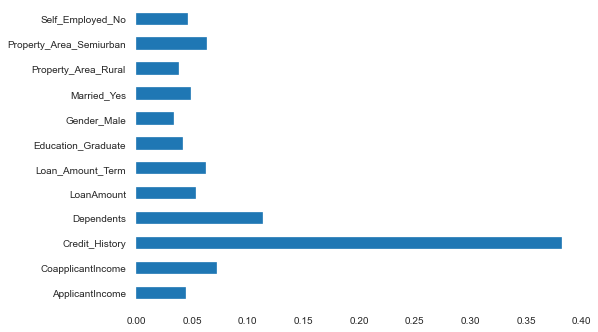

In [105]:
feat_importances = pd.Series(model.feature_importances_, index=x_res.columns)
feat_importances.plot(kind='barh')
plt.show()

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [107]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_res,y_res)

In [108]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_res.columns)

In [109]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [110]:
featureScores

,Specs,Score
0,ApplicantIncome,0.515789
1,CoapplicantIncome,5.189595
2,Credit_History,53.720497
3,Dependents,4.646048
4,LoanAmount,0.000000
5,Loan_Amount_Term,0.445129
6,Education_Graduate,2.372855
7,Gender_Male,0.479290
8,Married_Yes,6.260116
9,Property_Area_Rural,3.161290


In [111]:
## lets us the split the data 
x=data_train.drop('Loan_Status',axis=1)
y=data_train['Loan_Status'].astype(int)

In [112]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [162]:
## lets the split the data for train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=0)

In [163]:
## Logistic regression

from sklearn.metrics import accuracy_score
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
accuracy=round(accuracy_score(y_test,y_pred)*100,2)
accuracy



71.01

In [164]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [177]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(randomforest,x,y,cv=5)


In [178]:
score

array([0.78861789, 0.75609756, 0.7804878 , 0.77235772, 0.74590164])

In [179]:
score.mean()

0.7686925229908037

In [169]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [188]:
t1=[]
t2=[]
adff=[]
kf=KFold(n_splits=5)
for train_x,test_x in kf.split(x,y):
    ##t1.append(train_x)
    ##t2.append(test_x)
    ##print('trainind data',train_x,'validation',test_x)
    x2_train,x2_test=x.iloc[train_x],x.iloc[test_x]
    y2_train,y2_test=y.iloc[train_x],y.iloc[test_x]
    logreg.fit(x2_train,y2_train)
    prediction=logreg.predict(x2_test)
    Score=accuracy_score(prediction,y2_test)
    adff.append(Score)
print(adff)
    

[0.8048780487804879, 0.7560975609756098, 0.8048780487804879, 0.8536585365853658, 0.8032786885245902]


In [189]:
np.array(adff).mean()

0.8045581767293083

In [175]:
data_test=data_test.drop('Loan_Status',axis=1)

In [176]:
data_test

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Education_Graduate,Gender_Male,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Self_Employed_No
0,0,0,1,0,0,1,1,1,1,0,0,1
1,0,2,1,1,0,1,1,1,1,0,0,1
2,0,2,1,2,1,1,1,1,1,0,0,1
3,0,2,1,2,0,1,1,1,1,0,0,1
4,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,1,3,0,1,0,1,1,0,0,0
363,0,1,1,0,0,1,1,1,1,0,0,1
364,0,2,1,0,0,1,1,1,0,0,1,1
365,0,2,1,0,0,1,1,1,1,1,0,1


In [155]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=3,random_state=0)
skf.get_n_splits(x,y)
for train_index,test_index in skf.split(x,y):
    print("Train:",train_index,"validation:",test_index)
    x1_train,x1_test=x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    logreg.fit(x1_train,y1_train)
    prediction=logreg.predict(x1_test)
    Score=accuracy_score(prediction,y1_test)
    acc.append(Score)
print(acc)
    


Train: [192 195 199 202 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 441 442 443 444 445 446 447 448 449

C:\Users\venkatesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [156]:
np.array(acc).mean()

0.8013151602104257

In [157]:
##Decision tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_decisiontree)

70.41


In [158]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
y_pred
acc_randomforest = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_randomforest)

77.51


In [159]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_knn)

69.82


In [160]:
# classical Naive Bayes
from sklearn.naive_bayes import CategoricalNB

classical = CategoricalNB()
classical.fit(x_train, y_train)
y_pred = classical.predict(x_test)
acc_classical = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_classical)

75.15


In [161]:
## SVM 
from sklearn.svm import SVC
svector=SVC(C=1)
svector.fit(x_train,y_train)
y_pred=svector.predict(x_test)
acc_svm=round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_svm)

74.56
